In [21]:
import torch
from torch import nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from datetime import datetime
import glob, os
from IPython.display import display
import numpy as np
import random as random

# set the device which will be used to train the model
device = torch.device('cuda:0' if torch.cuda.device_count() >= 1 else 'cpu')

## Exercise1: Data Set Exploration and Visualization

In [22]:
train_path = './train'
test_path = './test'
train_file_names = open("train.txt", "r").read().splitlines()
eval_file_names = open("eval.txt", "r").read().splitlines()
test_file_names = os.listdir(test_path)

In [23]:
mapping_labels = {"boxing" : 0, "drums" : 1, "guitar" : 2, "rowing" : 3, "violin" : 4}
num_categories = 5

In [24]:
test_file_names.sort(key=lambda x: int(x[:x.index('.')]))

In [25]:
train_data_frame_list = []
eval_data_frame_list = []
eval_index_list = []
for index in range(len(train_file_names)):
    with open(os.path.join(train_path, train_file_names[index]), "r") as f:
        content = f.readlines()
        train_data_frame_list.append(pd.DataFrame([[float(p) for p in st.split(',')] for st in content[:len(content) // 2]]))
        train_data_frame_list[-1].columns = [str(i) for i in range(len(train_data_frame_list[-1].columns))]

for index in range(len(eval_file_names)):
    with open(os.path.join(train_path, eval_file_names[index]), "r") as f:
        content = f.readlines()
        eval_data_frame_list.append(pd.DataFrame([[float(p) for p in st.split(',')] for st in content[:len(content) // 2]]))
        eval_data_frame_list[-1].columns = [str(i) for i in range(len(eval_data_frame_list[-1].columns))]
        eval_index_list.append(index)

train_data_frame_list[0]

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,253.674301,102.96611,0.9078,269.803192,191.368973,0.785458,201.43306,201.431473,0.8228,181.371231,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,253.000000,102.00000,1.0000,270.000000,191.000000,1.000000,201.00000,202.000000,1.0000,181.000000,...,0.0,-0.159373,0.426741,0.0,-0.159373,0.426741,0.0,-0.159373,0.426741,0.0
2,253.000000,102.00000,1.0000,272.000000,189.000000,1.000000,201.00000,203.000000,1.0000,181.000000,...,0.0,-0.199359,0.532487,0.0,-0.199359,0.532487,0.0,-0.199359,0.532487,0.0
3,253.000000,102.00000,1.0000,272.000000,189.000000,1.000000,202.00000,204.000000,1.0000,182.000000,...,0.0,0.272133,0.604508,0.0,0.272133,0.604508,0.0,0.272133,0.604508,0.0
4,254.000000,101.00000,1.0000,273.000000,189.000000,1.000000,203.00000,204.000000,1.0000,184.000000,...,0.0,-0.865690,-4.388336,0.0,-0.865690,-4.388336,0.0,-0.865690,-4.388336,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,269.000000,86.00000,1.0000,291.000000,182.000000,1.000000,215.00000,193.000000,1.0000,196.000000,...,0.0,-25.497719,3.344067,0.0,-25.497719,3.344067,0.0,-25.497719,3.344067,0.0
218,273.000000,85.00000,1.0000,295.000000,182.000000,1.000000,219.00000,193.000000,1.0000,199.000000,...,0.0,-25.458832,3.297691,0.0,-25.458832,3.297691,0.0,-25.458832,3.297691,0.0
219,277.000000,85.00000,1.0000,300.000000,182.000000,1.000000,223.00000,191.000000,1.0000,202.000000,...,0.0,-25.466545,3.380524,0.0,-25.466545,3.380524,0.0,-25.466545,3.380524,0.0
220,282.000000,84.00000,1.0000,305.000000,182.000000,1.000000,230.00000,190.000000,1.0000,204.000000,...,0.0,-25.506676,3.337200,0.0,-25.506676,3.337200,0.0,-25.506676,3.337200,0.0


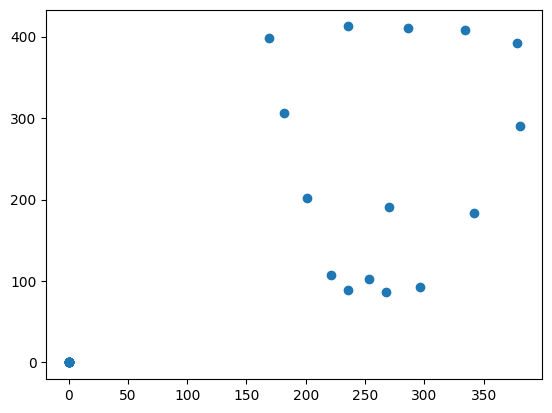

In [26]:
fig, ax = plt.subplots()
data = train_data_frame_list[0]
num_features = len(data.columns)

ax.scatter(data.iloc[0, range(0,num_features,3)], data.iloc[0, range(1,num_features,3)])

In [27]:
test_data_frame_list = []
for index in range(len(test_file_names)):
    with open(os.path.join(test_path, test_file_names[index]), "r") as f:
        content = f.readlines()
        test_data_frame_list.append(pd.DataFrame([[float(p) for p in st.split(',')] for st in content[:len(content) // 2]]))
        test_data_frame_list[-1].columns = [str(i) for i in range(len(test_data_frame_list[-1].columns))]

In [28]:
for i in range(2, 75, 3):
    for df in train_data_frame_list:
        df.loc[df[str(i)] == 0, [str(i-2), str(i-1)]] = np.nan

if len(eval_data_frame_list) > 0:
    for i in range(2, 75, 3):
        for df in eval_data_frame_list:
            df.loc[df[str(i)] == 0, [str(i-2), str(i-1)]] = np.nan

for i in range(2, 75, 3):
    for df in test_data_frame_list:
        df.loc[df[str(i)] == 0, [str(i-2), str(i-1)]] = np.nan

In [29]:
train_data_frame = pd.concat(train_data_frame_list)
train_data_frame = train_data_frame.reset_index(drop=True)

In [30]:
idx_maping = {2: "Nose", 5: "Neck", 8: "R Shoulder", 11: "R_Elbow", 14: "R_Wrist", 17: "L_Shoulder", 
            20: "L_Elbow", 23: "L_Wrist", 26: "M_Hip", 29: "R_Hip", 32: "R_Nee", 35: "R_Ankle", 38: "L_Hip", 
            41: "L_Nee", 44: "L_Ankle", 47: "R_Eye", 50: "L_Eye", 53: "R_Ear", 56: "L_Ear", 59: "L_Big_Toe", 
            62: "L_Small_Toe", 65: "L_Heel", 68: "R_Big_Toe", 71: "R_Small_Toe", 74: "R_Heel"}

for i in range(2, 75, 3):
    l = len(train_data_frame.loc[train_data_frame[str(i)] == 0])
    if (l > 0.9 * len(train_data_frame)):
        for df in train_data_frame_list:
            df.drop([str(i-2), str(i-1)], axis=1, inplace=True)
        if len(eval_data_frame_list) > 0:
            for df in eval_data_frame_list:
                df.drop([str(i-2), str(i-1)], axis=1, inplace=True)
        for df in test_data_frame_list:
            df.drop([str(i-2), str(i-1)], axis=1, inplace=True)
        print(idx_maping[i], " " * (11 - len(idx_maping[i])), i, l, "dropped")
    else:
        print(idx_maping[i], " " * (11 - len(idx_maping[i])), i, l)

Nose         2 114
Neck         5 3
R Shoulder   8 5
R_Elbow      11 47
R_Wrist      14 558
L_Shoulder   17 5
L_Elbow      20 31
L_Wrist      23 575
M_Hip        26 6
R_Hip        29 14
R_Nee        32 210746
R_Ankle      35 261418 dropped
L_Hip        38 13
L_Nee        41 204473
L_Ankle      44 261454 dropped
R_Eye        47 247
L_Eye        50 162
R_Ear        53 20836
L_Ear        56 20958
L_Big_Toe    59 261460 dropped
L_Small_Toe  62 261461 dropped
L_Heel       65 261458 dropped
R_Big_Toe    68 261457 dropped
R_Small_Toe  71 261457 dropped
R_Heel       74 261460 dropped


In [31]:
for df in train_data_frame_list:
    df.drop([str(i) for i in range(2, 75, 3)], axis=1, inplace=True)
for df in eval_data_frame_list:
    df.drop([str(i) for i in range(2, 75, 3)], axis=1, inplace=True)
for df in test_data_frame_list:
    df.drop([str(i) for i in range(2, 75, 3)], axis=1, inplace=True)

train_data_frame_list[0]

,0,1,3,4,6,7,9,10,12,13,...,39,40,45,46,48,49,51,52,54,55
0,253.674301,102.96611,269.803192,191.368973,201.43306,201.431473,181.371231,305.924591,169.328186,398.415344,...,NaN,NaN,235.681686,89.026604,267.719818,86.884895,221.565857,106.978127,295.942169,92.969368
1,253.000000,102.00000,270.000000,191.000000,201.00000,202.000000,181.000000,305.000000,172.000000,395.000000,...,NaN,NaN,235.000000,89.000000,267.000000,86.000000,221.000000,107.000000,296.000000,93.000000
2,253.000000,102.00000,272.000000,189.000000,201.00000,203.000000,181.000000,304.000000,175.000000,391.000000,...,NaN,NaN,235.000000,89.000000,267.000000,86.000000,221.000000,107.000000,296.000000,92.000000
3,253.000000,102.00000,272.000000,189.000000,202.00000,204.000000,182.000000,303.000000,178.000000,387.000000,...,NaN,NaN,235.000000,89.000000,267.000000,86.000000,221.000000,107.000000,296.000000,92.000000
4,254.000000,101.00000,273.000000,189.000000,203.00000,204.000000,184.000000,302.000000,182.000000,383.000000,...,NaN,NaN,235.000000,89.000000,268.000000,85.000000,221.000000,107.000000,297.000000,91.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,269.000000,86.00000,291.000000,182.000000,215.00000,193.000000,196.000000,292.000000,178.000000,365.000000,...,NaN,NaN,252.000000,78.000000,285.000000,69.000000,239.000000,96.000000,316.000000,85.000000
218,273.000000,85.00000,295.000000,182.000000,219.00000,193.000000,199.000000,293.000000,181.000000,376.000000,...,NaN,NaN,256.000000,77.000000,289.000000,68.000000,243.000000,95.000000,317.000000,84.000000
219,277.000000,85.00000,300.000000,182.000000,223.00000,191.000000,202.000000,294.000000,184.000000,385.000000,...,NaN,NaN,262.000000,75.000000,293.000000,68.000000,247.000000,95.000000,321.000000,84.000000
220,282.000000,84.00000,305.000000,182.000000,230.00000,190.000000,204.000000,297.000000,187.000000,397.000000,...,NaN,NaN,267.000000,74.000000,298.000000,67.000000,251.000000,94.000000,326.000000,84.000000


In [32]:
num_features = len(train_data_frame_list[0].columns)
num_features

34

In [33]:
##drop neck
for df in train_data_frame_list:
    df[df.columns[range(0, num_features-4, 2)]] = df[df.columns[range(0, num_features-4, 2)]].sub(df['3'], axis=0)
    df[df.columns[range(1, num_features-4, 2)]] = df[df.columns[range(1, num_features-4, 2)]].sub(df['4'], axis=0)
    df.drop(['3', '4'], axis=1, inplace=True)
for df in eval_data_frame_list:
    df[df.columns[range(0, num_features-4, 2)]] = df[df.columns[range(0, num_features-4, 2)]].sub(df['3'], axis=0)
    df[df.columns[range(1, num_features-4, 2)]] = df[df.columns[range(1, num_features-4, 2)]].sub(df['4'], axis=0)
    df.drop(['3', '4'], axis=1, inplace=True)
for df in test_data_frame_list:
    df[df.columns[range(0, num_features-4, 2)]] = df[df.columns[range(0, num_features-4, 2)]].sub(df['3'], axis=0)
    df[df.columns[range(1, num_features-4, 2)]] = df[df.columns[range(1, num_features-4, 2)]].sub(df['4'], axis=0)
    df.drop(['3', '4'], axis=1, inplace=True)
train_data_frame_list[0]

,0,1,6,7,9,10,12,13,15,16,...,39,40,45,46,48,49,51,52,54,55
0,-16.128891,-88.402863,-68.370132,10.0625,-88.431961,114.555618,-100.475006,207.046371,72.329865,-8.064682,...,NaN,NaN,-34.121506,-102.342369,-2.083374,-104.484077,221.565857,106.978127,295.942169,92.969368
1,-17.000000,-89.000000,-69.000000,11.0000,-89.000000,114.000000,-98.000000,204.000000,72.000000,-8.000000,...,NaN,NaN,-35.000000,-102.000000,-3.000000,-105.000000,221.000000,107.000000,296.000000,93.000000
2,-19.000000,-87.000000,-71.000000,14.0000,-91.000000,115.000000,-97.000000,202.000000,70.000000,-6.000000,...,NaN,NaN,-37.000000,-100.000000,-5.000000,-103.000000,221.000000,107.000000,296.000000,92.000000
3,-19.000000,-87.000000,-70.000000,15.0000,-90.000000,114.000000,-94.000000,198.000000,70.000000,-6.000000,...,NaN,NaN,-37.000000,-100.000000,-5.000000,-103.000000,221.000000,107.000000,296.000000,92.000000
4,-19.000000,-88.000000,-70.000000,15.0000,-89.000000,113.000000,-91.000000,194.000000,69.000000,-7.000000,...,NaN,NaN,-38.000000,-100.000000,-5.000000,-104.000000,221.000000,107.000000,297.000000,91.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,-22.000000,-96.000000,-76.000000,11.0000,-95.000000,110.000000,-113.000000,183.000000,74.000000,-12.000000,...,NaN,NaN,-39.000000,-104.000000,-6.000000,-113.000000,239.000000,96.000000,316.000000,85.000000
218,-22.000000,-97.000000,-76.000000,11.0000,-96.000000,111.000000,-114.000000,194.000000,74.000000,-12.000000,...,NaN,NaN,-39.000000,-105.000000,-6.000000,-114.000000,243.000000,95.000000,317.000000,84.000000
219,-23.000000,-97.000000,-77.000000,9.0000,-98.000000,112.000000,-116.000000,203.000000,74.000000,-12.000000,...,NaN,NaN,-38.000000,-107.000000,-7.000000,-114.000000,247.000000,95.000000,321.000000,84.000000
220,-23.000000,-98.000000,-75.000000,8.0000,-101.000000,115.000000,-118.000000,215.000000,74.000000,-12.000000,...,NaN,NaN,-38.000000,-108.000000,-7.000000,-115.000000,251.000000,94.000000,326.000000,84.000000


In [34]:
train_data_frame = pd.concat(train_data_frame_list)

In [35]:
std = train_data_frame.std()

In [36]:
std.sort_values()

7      6.719224
16     6.821346
6      9.150496
15     9.336125
24    12.438516
36    13.806552
27    13.897407
49    15.760351
1     15.973130
46    16.071189
45    17.073184
48    17.153954
0     17.925844
30    18.033851
52    20.557677
55    21.310782
51    25.453274
28    26.175731
40    26.178947
25    26.354030
37    26.709450
31    27.204049
54    27.227389
10    28.436968
9     28.467797
39    28.898984
19    30.026997
18    31.785149
12    57.550179
13    66.129667
22    72.843093
21    75.690933
dtype: float64

In [37]:
idx_maping = {2: "Nose", 5: "Neck", 8: "R Shoulder", 11: "R_Elbow", 14: "R_Wrist", 17: "L_Shoulder", 
            20: "L_Elbow", 23: "L_Wrist", 26: "M_Hip", 29: "R_Hip", 32: "R_Nee", 35: "R_Ankle", 38: "L_Hip", 
            41: "L_Nee", 44: "L_Ankle", 47: "R_Eye", 50: "L_Eye", 53: "R_Ear", 56: "L_Ear", 59: "L_Big_Toe", 
            62: "L_Small_Toe", 65: "L_Heel", 68: "R_Big_Toe", 71: "R_Small_Toe", 74: "R_Heel"}
columns = [4, 5, 6, 7, 10, 11, 12, 13]
train_data_frame_list[0].columns[columns]

Index(['9', '10', '12', '13', '18', '19', '21', '22'], dtype='object')

In [45]:
df = train_data_frame_list[0]
df[['9', '10', '12', '13', '18', '19', '21', '22']]

,9,10,12,13,18,19,21,22
0,-88.431961,114.555618,-100.475006,207.046371,110.491272,98.505539,108.544098,200.886093
1,-89.000000,114.000000,-98.000000,204.000000,111.000000,98.000000,106.000000,197.000000
2,-91.000000,115.000000,-97.000000,202.000000,110.000000,98.000000,104.000000,192.000000
3,-90.000000,114.000000,-94.000000,198.000000,112.000000,96.000000,103.000000,186.000000
4,-89.000000,113.000000,-91.000000,194.000000,115.000000,93.000000,101.000000,178.000000
...,...,...,...,...,...,...,...,...
217,-95.000000,110.000000,-113.000000,183.000000,110.000000,104.000000,103.000000,219.000000
218,-96.000000,111.000000,-114.000000,194.000000,110.000000,109.000000,110.000000,225.000000
219,-98.000000,112.000000,-116.000000,203.000000,110.000000,112.000000,114.000000,226.000000
220,-101.000000,115.000000,-118.000000,215.000000,110.000000,114.000000,120.000000,227.000000


In [46]:
essential_train_data_list = []
essential_eval_data_list = []
essential_test_data_list = []
for df in train_data_frame_list:
    essential_train_data_list.append(df[df.columns[columns]])
for df in eval_data_frame_list:
    essential_eval_data_list.append(df[df.columns[columns]])
for df in test_data_frame_list:
    essential_test_data_list.append(df[df.columns[columns]])

In [48]:
class Normalization():
  def __init__(self, input):
    self.mean = input.mean()
    self.std = input.std()

  def transform(self, data):
    return (data - self.mean) / self.std

normalization = Normalization(pd.concat(essential_train_data_list))

In [49]:
train_normalized_data_list = []
for df in essential_train_data_list:
  train_normalized_data_list.append(np.nan_to_num(normalization.transform(df).values))
  
if len(eval_data_frame_list) > 0:
    eval_normalized_data_list = []
    for df in essential_eval_data_list:
        eval_normalized_data_list.append(np.nan_to_num(normalization.transform(df).values))
    eval_normalized_data_list[0]

test_normalized_data_list = []
for df in essential_test_data_list:
    test_normalized_data_list.append(np.nan_to_num(normalization.transform(df).values))
test_normalized_data_list[0]

array([[-5.12250480e-02,  2.73506212e-03,  2.51820658e-01, ...,
        -1.40248857e+00,  1.47370211e-01, -1.04672391e+00],
       [-3.42723844e-02, -1.25044269e-02,  2.57386453e-01, ...,
        -1.41106138e+00,  1.55472248e-01, -1.04669940e+00],
       [-3.42723844e-02,  3.74315990e-01,  2.92138734e-01, ...,
        -1.41106138e+00,  1.68683870e-01, -1.04669940e+00],
       ...,
       [ 8.55026876e-04, -4.76699193e-02,  6.04909262e-01, ...,
        -1.44436474e+00,  2.08318737e-01, -1.06042754e+00],
       [-3.42723844e-02, -8.28354118e-02,  5.18028560e-01, ...,
        -1.44436474e+00,  2.08318737e-01, -1.06042754e+00],
       [ 3.59824381e-02, -1.25044269e-02,  5.18028560e-01, ...,
        -1.44436474e+00,  2.21530359e-01, -1.07415568e+00]])

In [50]:
class Create_Dataset(Dataset):
  def __init__(self, data, time_length, sliding_step):
    input = []
    labels = []
    i = 0
    for dt in range(len(data)):
      name = train_file_names[dt]
      label = mapping_labels[name[name.index('_')+1: name.index('.')]]
      for i in range(0, len(data[dt]) - time_length + 1, sliding_step):
        input.append(data[dt][i:i+time_length])
        labels.append(label)
        
    self.data =  torch.from_numpy(np.stack(input)) # Shape = [num_samples, time_length, features]
    self.labels = torch.tensor(labels) # Shape = [num_samples]

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx], self.labels[idx]

In [51]:
# define time_length, sliding_step and batch_size
time_length = 90 
sliding_step = time_length // 2
batch_size = 30
dataset = Create_Dataset(train_normalized_data_list, time_length, sliding_step)
dl_train = DataLoader(dataset, batch_size, shuffle=True)
next(iter(dl_train))[0].shape

torch.Size([30, 90, 8])

In [52]:
class Evaluation():
  def __init__(self):
    self.eval_data = []
    self.labels = []
    for dt in range(len(eval_normalized_data_list)):
      name = eval_file_names[dt]
      label = mapping_labels[name[name.index('_')+1: name.index('.')]]
      data = []
      for i in range(0, len(eval_normalized_data_list[dt]) - time_length + 1, sliding_step):
        data.append(eval_normalized_data_list[dt][i:i+time_length])
      self.eval_data.append(torch.from_numpy(np.stack(data)))
      self.labels.append(label)
      
  def eval(self, model, type="RNN"):
    model.eval()
    count = 0
    for i in range(len(self.eval_data)):
      if type == 'RNN':
        prediction = model(self.eval_data[i].to(device))
      else:
        prediction = model(self.eval_data[i].unsqueeze(1).to(device))
      pre = prediction.argmax(dim=1)
      if pre.bincount().argmax().item() == self.labels[i]:
        count += 1

    return 0 if len(self.eval_data) == 0 else count/len(self.eval_data)

evaluation = Evaluation()

# 2. Training
The function below is used to train a model. The learning rate is reduced during the training to achieve a better result.

In [53]:
def Train_Model(model, model_type='RNN', learning_rate=0.1):
    # use CrossEntropyLoss for classification problem
    loss = nn.CrossEntropyLoss()
    # use SGD optimization
    optimizer = optim.SGD(model.parameters(), lr = learning_rate)
    train_losses = []
    train_accuracies = []
    eval_accuracies = []
    best_loss = float('inf')
    best_model = model
    lr_idx = 0
    epoch = 0
    while learning_rate >= 1e-3:
        epoch += 1
        # set the model in training mode      
        model.train()
        train_loss, train_acc = 0., 0.
        for batch in dl_train:            
            # send the input to the device
            x_batch, y_batch = batch[0].to(device), batch[1].to(device)
            if model_type == 'CNN':
                x_batch = x_batch.unsqueeze(1) # change size to [num_batch, channel, height, width]
            # perform a forward pass and calculate the training loss
            predictions = model(x_batch)
            l = loss(predictions, y_batch)

            # zero out the gradients, perform the backpropagation step, and update the weights
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_loss += l.item()*len(x_batch)
            train_acc += (predictions.argmax(dim=1) == y_batch).type(torch.float).sum().item()

        
        eval_acc = evaluation.eval(model, model_type)*100
        eval_accuracies.append(eval_acc)

        train_loss /= len(dl_train.dataset)
        train_acc /= len(dl_train.dataset)/100.
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
                  
        print(f"Epoch {'{:03d}'.format(epoch)} - Training loss: {'{:.3f}'.format(train_loss)} - Training accuracy: {'{:.2f}'.format(train_acc)}% - Eval accuracy: {'{:.2f}'.format(eval_acc)}% - Learning rate: {learning_rate}")

        # save the best model
        if (best_loss > train_loss):
            best_loss = train_loss
            best_model = model
            lr_idx = epoch
        
        # reduce the learning rate, if the loss has not reduced in the past epochs
        if lr_idx + 3 <= epoch:
            learning_rate /= 2.
            optimizer.param_groups[0]['lr'] = learning_rate
            lr_idx = epoch
            model = best_model
            
    # plot training loss and accuracy
    
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1)
    fig.subplots_adjust(wspace = 0.3)
    ax0.plot(range(1, epoch+1), train_losses, 'blue')
    ax0.set_xlabel('Epoch')
    ax0.set_ylabel('Loss')
    ax0.set_title("Training losses")
    ax1.plot(range(1, epoch+1), train_accuracies, 'orange')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.set_title("Training accuracies")
    ax2.plot(range(1, epoch+1), eval_accuracies, 'orange')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title("Eval accuracies")
    
    return best_model

In [54]:
num_features = train_normalized_data_list[0].shape[1]
num_features

8

In [55]:
class RNN_NET(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()        
        self.rnn = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.Dropout(0.2),
                                 nn.Linear(time_length*hidden_dim, 128),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(128, num_categories))        
    def forward(self, X):
        hidden_output, _ = self.rnn(X)
        output = self.net(hidden_output)
        return output
    
rnn_model = RNN_NET(input_dim=num_features, hidden_dim=32).double().to(device)
print(rnn_model)

RNN_NET(
  (rnn): LSTM(8, 32, batch_first=True)
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Dropout(p=0.2, inplace=False)
    (2): Linear(in_features=2880, out_features=128, bias=True)
    (3): ReLU()
    (4): Dropout(p=0.2, inplace=False)
    (5): Linear(in_features=128, out_features=5, bias=True)
  )
)


In [56]:
class CNN_NET(nn.Module):
  def __init__(self, height, width):
    super().__init__()
        
    self.net = nn.Sequential(nn.Conv2d(1, 16, kernel_size=2, padding=1),
                             nn.ReLU(),
                             nn.MaxPool2d(kernel_size=2),
                             nn.Dropout(0.2),
                             nn.Conv2d(16, 32, kernel_size=2, padding=1),
                             nn.ReLU(),
                             nn.MaxPool2d(kernel_size=2),
                             nn.Dropout(0.2),
                             nn.Flatten())
    
    x = self.net(torch.rand(1, 1, height, width))
    print(x.shape)
    self.net.append(nn.Linear(x.shape[1], 64))
    self.net.append(nn.ReLU())
    self.net.append(nn.Dropout(0.2))
    self.net.append(nn.Linear(64, num_categories))
  def forward(self, x):
    return self.net(x)

cnn_model = CNN_NET(height=time_length, width=num_features).double().to(device)
print(cnn_model)

torch.Size([1, 1472])
CNN_NET(
  (net): Sequential(
    (0): Conv2d(1, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.2, inplace=False)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=1472, out_features=64, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=64, out_features=5, bias=True)
  )
)


Epoch 001 - Training loss: 0.543 - Training accuracy: 79.62% - Eval accuracy: 93.04% - Learning rate: 0.1
Epoch 002 - Training loss: 0.145 - Training accuracy: 95.01% - Eval accuracy: 93.48% - Learning rate: 0.1
Epoch 003 - Training loss: 0.093 - Training accuracy: 96.95% - Eval accuracy: 97.83% - Learning rate: 0.1
Epoch 004 - Training loss: 0.055 - Training accuracy: 98.18% - Eval accuracy: 97.39% - Learning rate: 0.1
Epoch 005 - Training loss: 0.053 - Training accuracy: 98.27% - Eval accuracy: 97.83% - Learning rate: 0.1
Epoch 006 - Training loss: 0.034 - Training accuracy: 99.00% - Eval accuracy: 98.26% - Learning rate: 0.1
Epoch 007 - Training loss: 0.021 - Training accuracy: 99.20% - Eval accuracy: 97.83% - Learning rate: 0.1
Epoch 008 - Training loss: 0.020 - Training accuracy: 99.38% - Eval accuracy: 97.39% - Learning rate: 0.1
Epoch 009 - Training loss: 0.017 - Training accuracy: 99.57% - Eval accuracy: 98.26% - Learning rate: 0.1
Epoch 010 - Training loss: 0.009 - Training ac

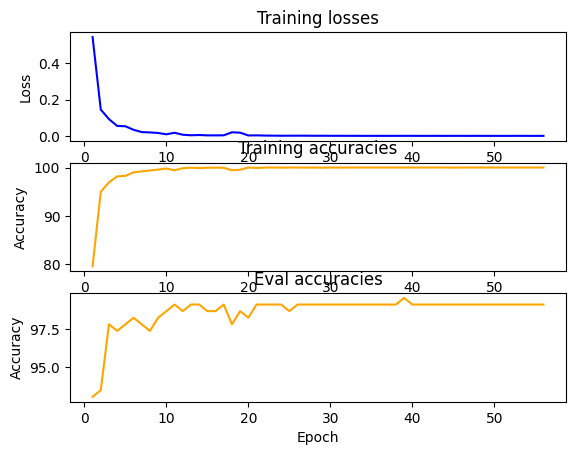

In [49]:
rnn_model = Train_Model(rnn_model, model_type='RNN', learning_rate = 0.1)

In [50]:
#cnn_model = Train_Model(cnn_model, model_type='CNN', learning_rate = 0.1)
#torch.save(cnn_model,f'{version}_cnn.pt')

In [52]:
output = open(f'./result.csv', 'w')
output.write('id,action')

rnn_model.eval()
cnn_model.eval()

i=0
test_data = []
for dt in range(len(test_normalized_data_list)):
    data = []
    for i in range(0, len(test_normalized_data_list[dt]) - time_length + 1, sliding_step):
        data.append(test_normalized_data_list[dt][i:i+time_length])
    
    data = torch.from_numpy(np.stack(data))
    prediction_rnn = rnn_model(data.to(device))
    pre_rnn = prediction_rnn.argmax(dim=1)
    # Shape: [samples, channel=1, height, width]
    #prediction_cnn = cnn_model(data.unsqueeze(1).to(device))
    #pre_cnn = prediction_cnn.argmax(dim=1)

    '''
    if pre_rnn.bincount()[pre_rnn.bincount().argmax().item()].item()/pre_rnn.shape[0] > pre_cnn.bincount()[pre_cnn.bincount().argmax().item()].item()/pre_cnn.shape[0]:
        print(dt, pre_rnn.bincount()[pre_rnn.bincount().argmax().item()].item()/pre_rnn.shape[0])
        output.write(f"\n{dt},{pre_rnn.bincount().argmax().item()}")
    else:
        print(dt, pre_cnn.bincount()[pre_cnn.bincount().argmax().item()].item()/pre_cnn.shape[0])
        output.write(f"\n{dt},{pre_cnn.bincount().argmax().item()}")
    print(dt, pre_rnn.bincount()[pre_rnn.bincount().argmax().item()].item()/pre_rnn.shape[0])
    '''
    output.write(f"\n{dt},{pre_rnn.bincount().argmax().item()}")
output.close()